In [1]:
import pandas as pd
import json
from sklearn import preprocessing as p

### Task 1: Load the dataset from a CSV file

In [2]:
movies_path = '...\\movies_metadata_changed.csv'
movies_raw = pd.read_csv(movies_path, quotechar='"')

In [3]:
ratings_path = '...\\ratings.csv'
ratings_raw = pd.read_csv(ratings_path)

In [4]:
movies = movies_raw[['id', 'genres', 'title', 'release_date', 'status']].rename(columns={'id': 'movieId'})
movies = movies.drop_duplicates()

ratings = ratings_raw[['movieId', 'rating']]

In [17]:
ratings_grouped = ratings.groupby('movieId')['rating'].mean()
ratings_grouped = ratings_grouped.reset_index().rename(columns={'rating': 'avg_rating'})
ratings_grouped['avg_rating'] = round(ratings_grouped['avg_rating'], 2)

,movieId,avg_rating
0,1,3.89
1,2,3.24
2,3,3.18
3,4,2.88
4,5,3.08
...,...,...
45110,176267,4.00
45111,176269,3.50
45112,176271,5.00
45113,176273,1.00


In [7]:
movies = movies.merge(ratings_grouped, on='movieId', how='left')

### Task 2: Print the number of movies in the dataset

In [20]:
movies.shape[0]

45433

### Task 3: Print the average rating of all the movies

Only 7565 movieIds match to each other in movies_metadata.csv and ratings.csv. Hence I am printing two versions of the answer.
a) avg rating aff all movies from ratings.csv
b) avg rating off all movies from movies_metadata.csv found in ratings.csv

In [12]:
# Task 3a
print(ratings['rating'].mean())

3.5280903543608817


In [10]:
# Task 3b
print(ratings.merge(movies, on='movieId')['rating'].mean())

3.532718731703427


### Task 4: Print the top 5 highest rated movies

If we just use average rating, then we miss valuable information about number of ratings.
Rating_value and number_of_ratings should have equal weight in comparing movies. Hence I
want to print two results. 
    a) Print top 5 highest rated movies
    b) Calculate weighted_rate and rate by it

In [21]:
# Task 4a:
movies[['movieId', 'title', 'avg_rating']].sort_values(by='avg_rating', ascending=False).head()

,movieId,title,avg_rating
43703,167666,Monster High: Escape from Skull Shores,5.0
21053,105526,Any Day Now,5.0
32154,137853,Journey to Planet X,5.0
32648,132912,The Price of Sex,5.0
36504,166225,Khel,5.0


In [19]:
# Task 4b:
movie_ratings = ratings.merge(movies[['movieId', 'title', 'avg_rating']], on='movieId')
movie_ratings['balanced_rating'] = movie_ratings['rating'] - 2.5
movie_ratings = movie_ratings.groupby(by=['movieId', 'title', 'avg_rating'])['balanced_rating'].sum().reset_index()

min_max_scaler = p.MinMaxScaler(feature_range=(0,5))
x = movie_ratings['balanced_rating'].values.reshape(-1, 1)
movie_ratings['final_rating'] = min_max_scaler.fit_transform(x)

movie_ratings['final_rating'] = round(movie_ratings['final_rating'], 2)
movie_ratings['avg_rating'] = round(movie_ratings['avg_rating'], 2)

movie_ratings = movie_ratings[['movieId', 'title', 'avg_rating', 'final_rating']].sort_values('final_rating', ascending=False)
movie_ratings.head()

,movieId,title,avg_rating,final_rating
256,318,The Million Dollar Hotel,4.43,5.00
236,296,Terminator 3: Rise of the Machines,4.17,4.20
448,593,Solaris,4.15,3.98
206,260,The 39 Steps,4.13,3.61
394,527,Once Were Warriors,4.27,3.44


### Task 5: Print the number of movies released each year

In [23]:
pd.set_option('display.max_rows', None)

movies_by_year = movies
movies_by_year['release_year'] = pd.DatetimeIndex(movies_by_year['release_date']).year.astype('Int64')
movies_by_year = movies_by_year.loc[movies_by_year['status'] == 'Released']
movies_by_year = movies_by_year.groupby('release_year')['movieId'].count()
movies_by_year = movies_by_year.reset_index().rename(columns={'movieId': 'movies_count'})
movies_by_year

,release_year,movies_count
0,1874,1
1,1878,1
2,1883,1
3,1887,1
4,1888,2
5,1890,5
6,1891,6
7,1892,3
8,1893,1
9,1894,13


<Axes: xlabel='release_year', ylabel='movies_count'>

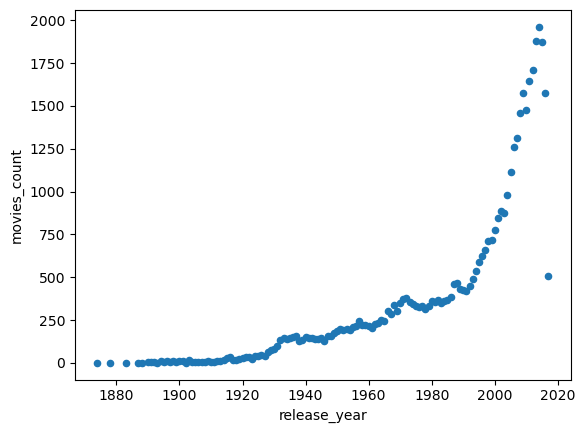

In [24]:
movies_by_year.plot.scatter(x='release_year', y='movies_count')

### Task 6: Print the number of movies in each genre

In [14]:
pd.set_option('display.max_rows', 20)

df = movies[['movieId', 'genres']]
df['genres'] = df['genres'].str.replace("'", '"')

genres = pd.json_normalize(df['genres'].apply(json.loads))
df = pd.concat([movies['movieId'], genres], axis=1)

df = pd.melt(df, id_vars='movieId', value_vars=df.columns[1:], var_name='genre_num', value_name='genre')
df = df.drop(columns=('genre_num'))

df['genre'] = df['genre'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
df = df.loc[df['genre'].notna()]
df = df.groupby('genre').count()
df

C:\Users\nurbe\AppData\Local\Temp\ipykernel_24536\1876724342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].str.replace("'", '"')


,movieId
genre,
Action,6592
Adventure,3490
Animation,1931
Comedy,13176
Crime,4304
Documentary,3930
Drama,20244
Family,2767
Fantasy,2309


### Task 7: Save the dataset to a JSON file

In [17]:
output_file = 'C:\\Users\\nurbe\Desktop\Вакансии\Adastra\Task\data\\result.json'
final_df = movies.merge(movie_ratings[['movieId', 'final_rating']], on='movieId')
final_df.to_json(output_file, orient='records')